### Importing Libraries

In [1]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Run before importing KMeans

import os
os.environ["OMP_NUM_THREADS"] = '1'

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.utils import shuffle

In [2]:
# Loading of the dataset 
hse = pd.read_csv('ParisHousing1.csv')

In [3]:
#sampling random rows from the dataframe 
hse.sample(5)

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
7061,7061,58610,9,83,32703,3,2,2012,True,True,2014,6018,644,True,1,5868889.2,Basic,no pool and no yard
6941,6941,29141,92,67,44478,8,9,1999,False,False,6084,9175,286,False,3,2926194.9,Basic,has pool and has yard
4522,4522,24055,32,81,18804,5,6,2018,True,True,5640,7433,818,False,6,2418314.8,Basic,has pool and no yard
8882,8882,43613,23,27,76264,10,4,1993,True,True,2902,4897,360,True,2,4364937.3,Basic,no pool and no yard
4216,4216,27281,16,61,76915,2,5,1994,True,False,4939,6528,897,False,3,2731771.4,Basic,no pool and no yard


In [4]:
#displaying the first 5 rows of the dataset
hse.head(5)

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,0,75523,3,63,9373,3,8,2005,False,True,4313,9005,956,False,7,7559081.5,Basic,has pool and no yard
1,1,80771,39,98,39381,8,6,2015,True,False,3653,2436,128,True,2,8085989.5,Luxury,has pool and has yard
2,2,55712,58,19,34457,6,8,2021,False,False,2937,8852,135,True,9,5574642.1,Basic,has pool and no yard
3,3,32316,47,6,27939,10,4,2012,False,True,659,7141,359,False,3,3232561.2,Basic,no pool and no yard
4,4,70429,19,90,38045,3,7,1990,True,False,8435,2429,292,True,4,7055052.0,Luxury,has pool and has yard


In [5]:
#displaying the last 5 rows of the dataset
hse.tail(5)

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
9995,9995,1726,89,5,73133,7,6,2009,False,True,9311,1698,218,False,4,176425.9,Basic,has pool and no yard
9996,9996,44403,29,12,34606,9,4,1990,False,True,9061,1742,230,False,0,4448474.0,Basic,has pool and has yard
9997,9997,83841,3,69,80933,10,10,2005,True,True,8304,7730,345,True,9,8390030.5,Basic,no pool and no yard
9998,9998,59036,70,96,55856,1,3,2010,False,True,2590,6174,339,True,4,5905107.0,Basic,no pool and no yard
9999,9999,1440,84,49,18412,6,10,1994,True,False,8485,2024,278,True,6,146708.4,Basic,no pool and no yard


In [6]:
hse.shape

(10000, 18)

In [7]:
#Displaying the column names
print(hse.keys())

Index(['Unnamed: 0', 'squareMeters', 'numberOfRooms', 'floors', 'cityCode',
       'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category', 'PoolAndYard'],
      dtype='object')


In [8]:
hse.describe()

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,basement,attic,garage,hasGuestRoom,price
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.00000,10000.00000,1.000000e+04
mean,4999.50000,49870.13120,49.781200,50.276300,50225.486100,5.510100,5.521700,2005.48850,5033.103900,5028.01060,553.12120,4.99460,4.993448e+06
std,2886.89568,28774.37535,29.265604,28.889171,29006.675799,2.872024,2.856667,9.30809,2876.729545,2894.33221,262.05017,3.17641,2.877424e+06
min,0.00000,89.00000,1.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,1.00000,100.00000,0.00000,1.031350e+04
25%,2499.75000,25098.50000,24.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,2559.750000,2512.00000,327.75000,2.00000,2.516402e+06
50%,4999.50000,50105.50000,49.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,5092.500000,5045.00000,554.00000,5.00000,5.016180e+06
75%,7499.25000,74609.75000,75.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,7511.250000,7540.50000,777.25000,8.00000,7.469092e+06
max,9999.00000,99999.00000,100.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,10000.000000,10000.00000,1000.00000,10.00000,1.000677e+07


In [9]:
hse.describe(include = 'all')

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000,10000,10000.000000,10000.00000,10000.00000,10000,10000.00000,1.000000e+04,10000,10000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,2,NaN,NaN,2,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,True,NaN,NaN,Basic,has pool and has yard
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5009,5001,NaN,NaN,NaN,5030,NaN,NaN,8735,2566
mean,4999.50000,49870.13120,49.781200,50.276300,50225.486100,5.510100,5.521700,2005.48850,NaN,NaN,5033.103900,5028.01060,553.12120,NaN,4.99460,4.993448e+06,NaN,NaN
std,2886.89568,28774.37535,29.265604,28.889171,29006.675799,2.872024,2.856667,9.30809,NaN,NaN,2876.729545,2894.33221,262.05017,NaN,3.17641,2.877424e+06,NaN,NaN
min,0.00000,89.00000,1.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,NaN,NaN,0.000000,1.00000,100.00000,NaN,0.00000,1.031350e+04,NaN,NaN
25%,2499.75000,25098.50000,24.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,NaN,NaN,2559.750000,2512.00000,327.75000,NaN,2.00000,2.516402e+06,NaN,NaN
50%,4999.50000,50105.50000,49.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,NaN,NaN,5092.500000,5045.00000,554.00000,NaN,5.00000,5.016180e+06,NaN,NaN
75%,7499.25000,74609.75000,75.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,NaN,NaN,7511.250000,7540.50000,777.25000,NaN,8.00000,7.469092e+06,NaN,NaN


In [10]:
# Checking the dataset information
hse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   squareMeters       10000 non-null  int64  
 2   numberOfRooms      10000 non-null  int64  
 3   floors             10000 non-null  int64  
 4   cityCode           10000 non-null  int64  
 5   cityPartRange      10000 non-null  int64  
 6   numPrevOwners      10000 non-null  int64  
 7   made               10000 non-null  int64  
 8   isNewBuilt         10000 non-null  bool   
 9   hasStormProtector  10000 non-null  bool   
 10  basement           10000 non-null  int64  
 11  attic              10000 non-null  int64  
 12  garage             10000 non-null  int64  
 13  hasStorageRoom     10000 non-null  bool   
 14  hasGuestRoom       10000 non-null  int64  
 15  price              10000 non-null  float64
 16  category           1000

In [11]:
hse.isnull().sum()

Unnamed: 0           0
squareMeters         0
numberOfRooms        0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
PoolAndYard          0
dtype: int64

In [12]:
# checking for duplicated rows in the dataset
print('The number of duplicated rows in this datset is {}, amounting to about {}% of the entire dataset'
      .format(hse.duplicated().sum(),(hse.duplicated().sum()/len(hse)*100.0).round(2)))

The number of duplicated rows in this datset is 0, amounting to about 0.0% of the entire dataset


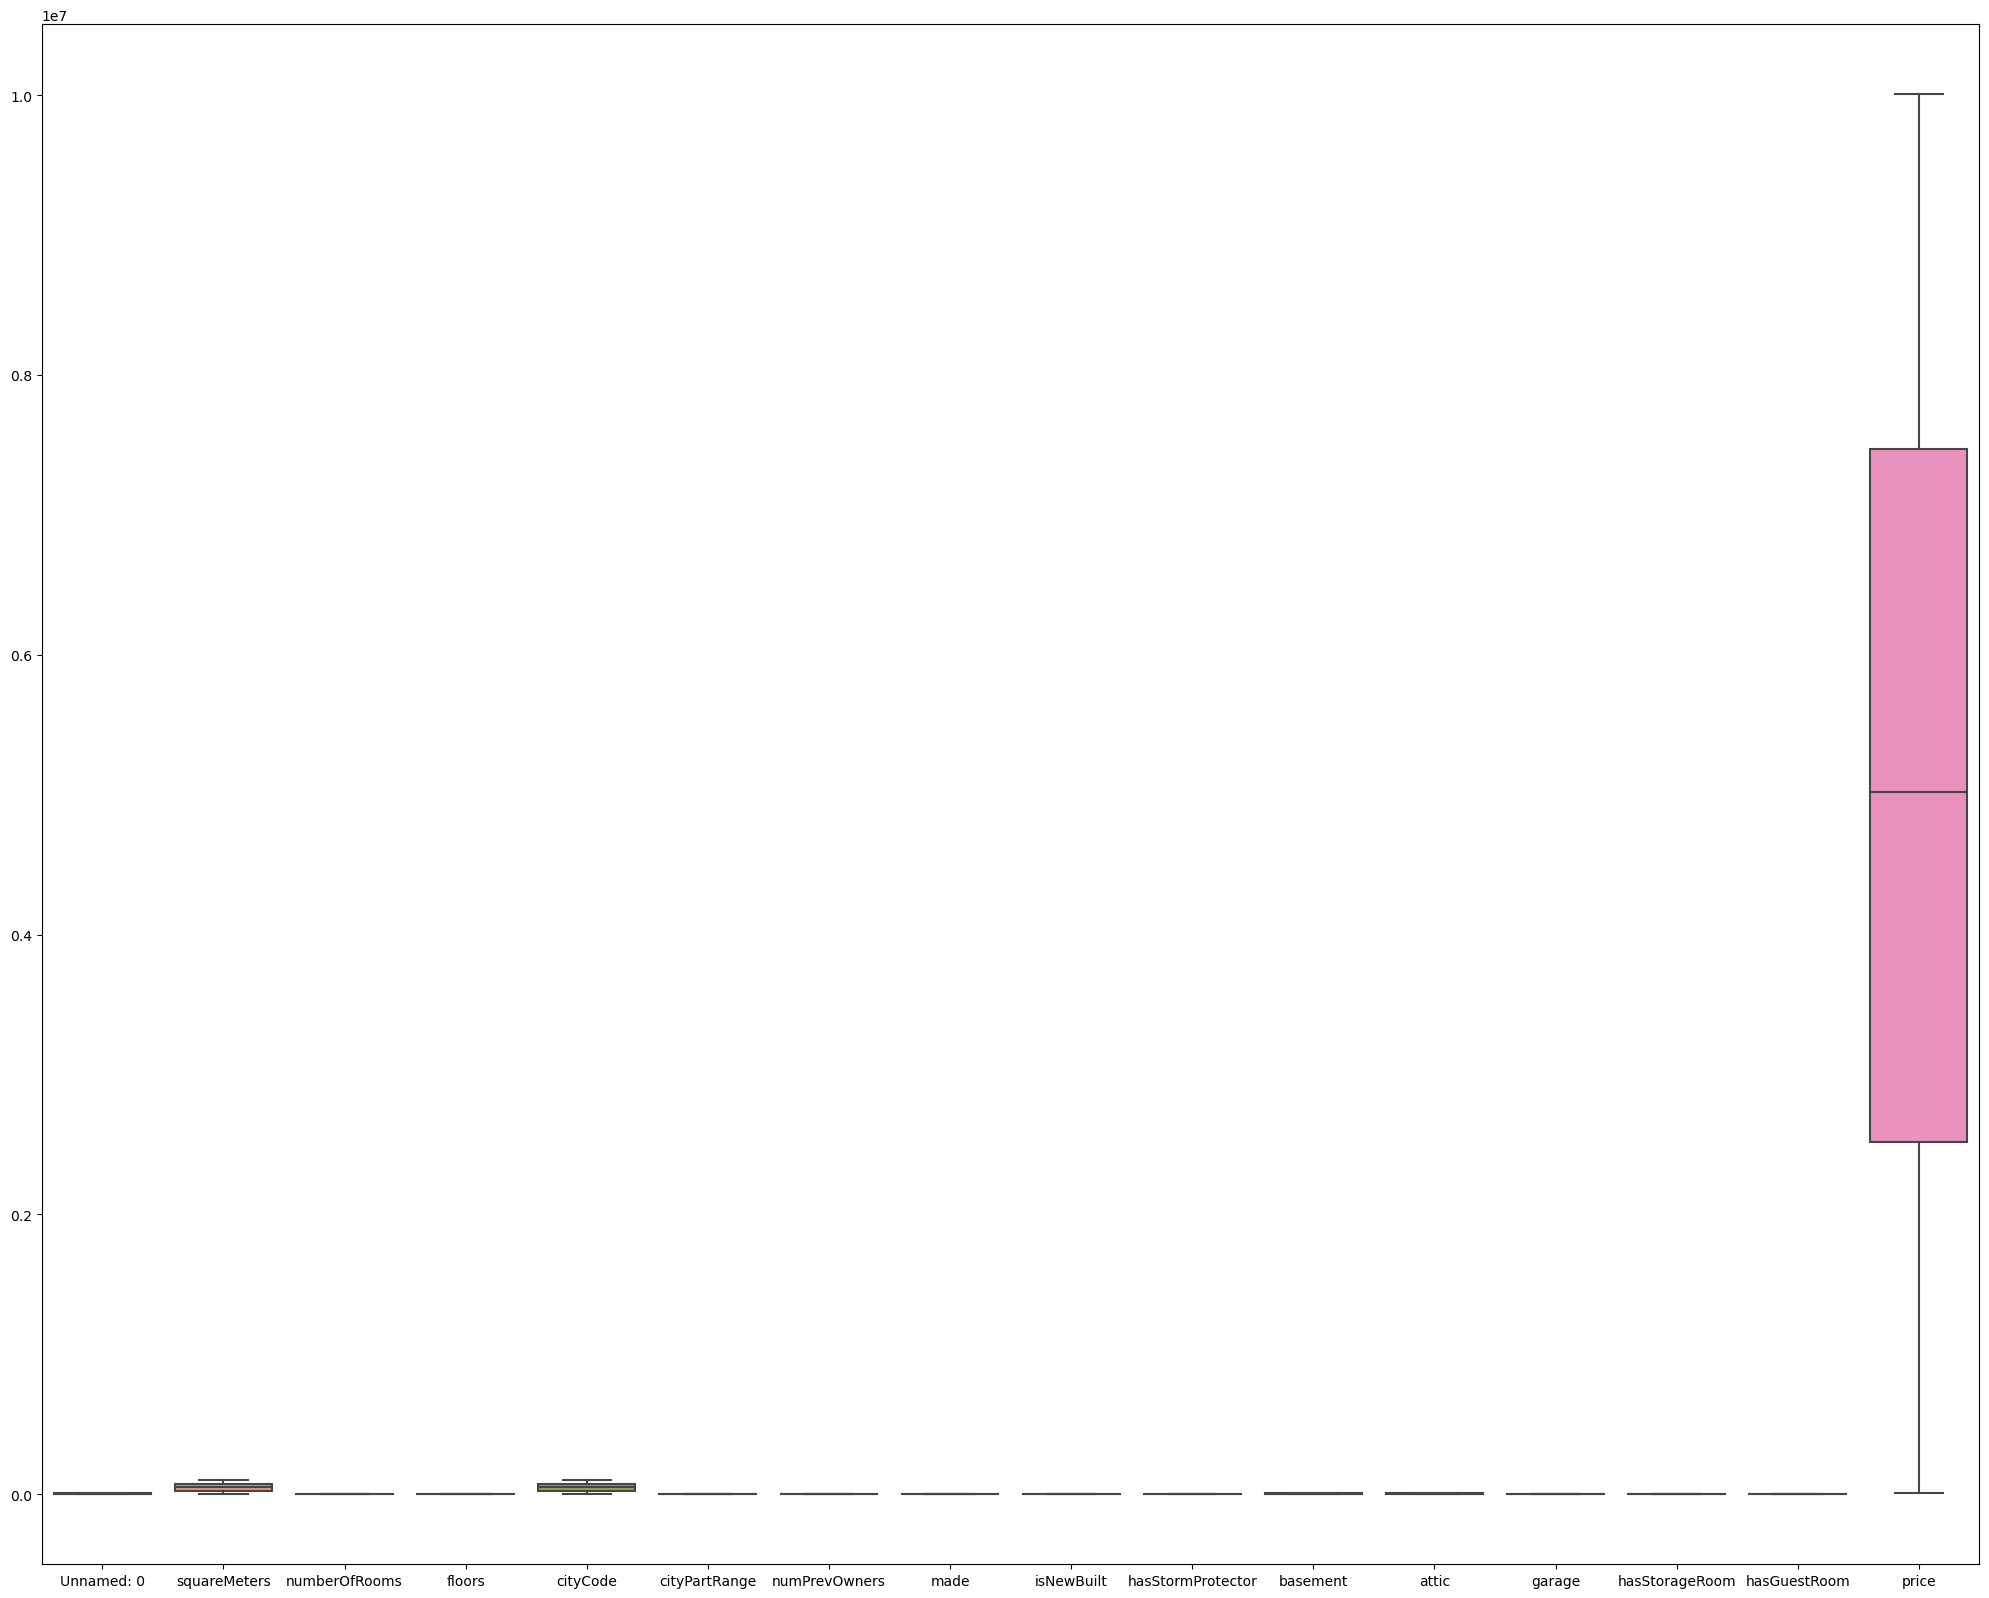

In [13]:
plt.figure(figsize = (25,20))
sns.boxplot(data=hse, showfliers=True)
plt.show()

### Data Visualization

<Axes: title={'center': 'Buildings with Pools and Not'}, xlabel='PoolAndYard', ylabel='count'>

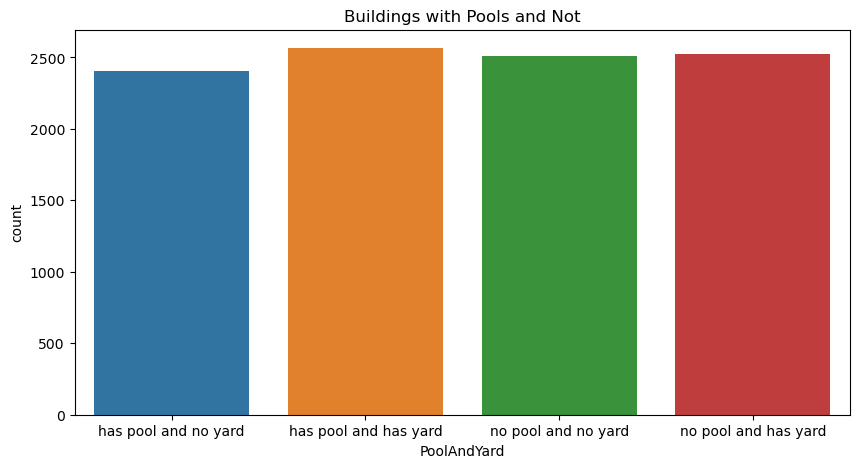

In [14]:
plt.figure(figsize = (10,5))
plt.title("Buildings with Pools and Not")
sns.countplot(hse, x="PoolAndYard")

<Axes: title={'center': 'Buildings based on Category'}, xlabel='category', ylabel='count'>

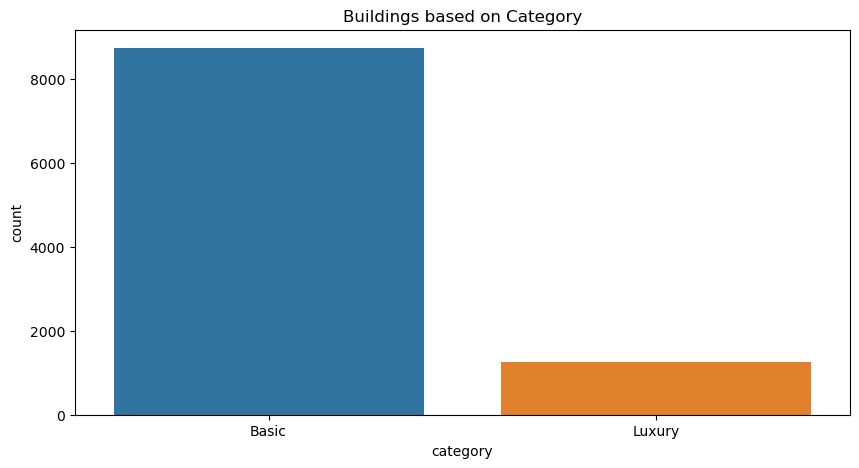

In [15]:
plt.figure(figsize = (10,5))
plt.title("Buildings based on Category")
sns.countplot(hse, x="category")

<Axes: title={'center': 'Buildings based on Newly Built'}, xlabel='isNewBuilt', ylabel='count'>

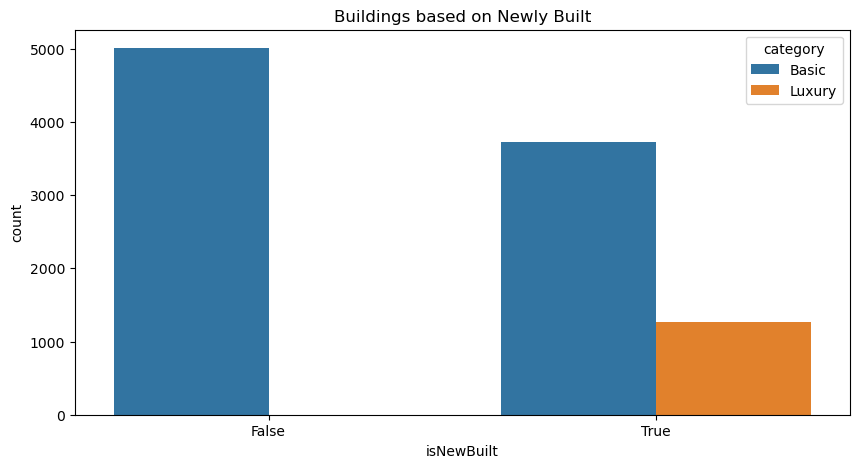

In [16]:
plt.figure(figsize = (10,5))
plt.title("Buildings based on Newly Built")
sns.countplot(hse, x="isNewBuilt", hue="category")

<Axes: title={'center': 'Buildings based on year Built'}, xlabel='made', ylabel='count'>

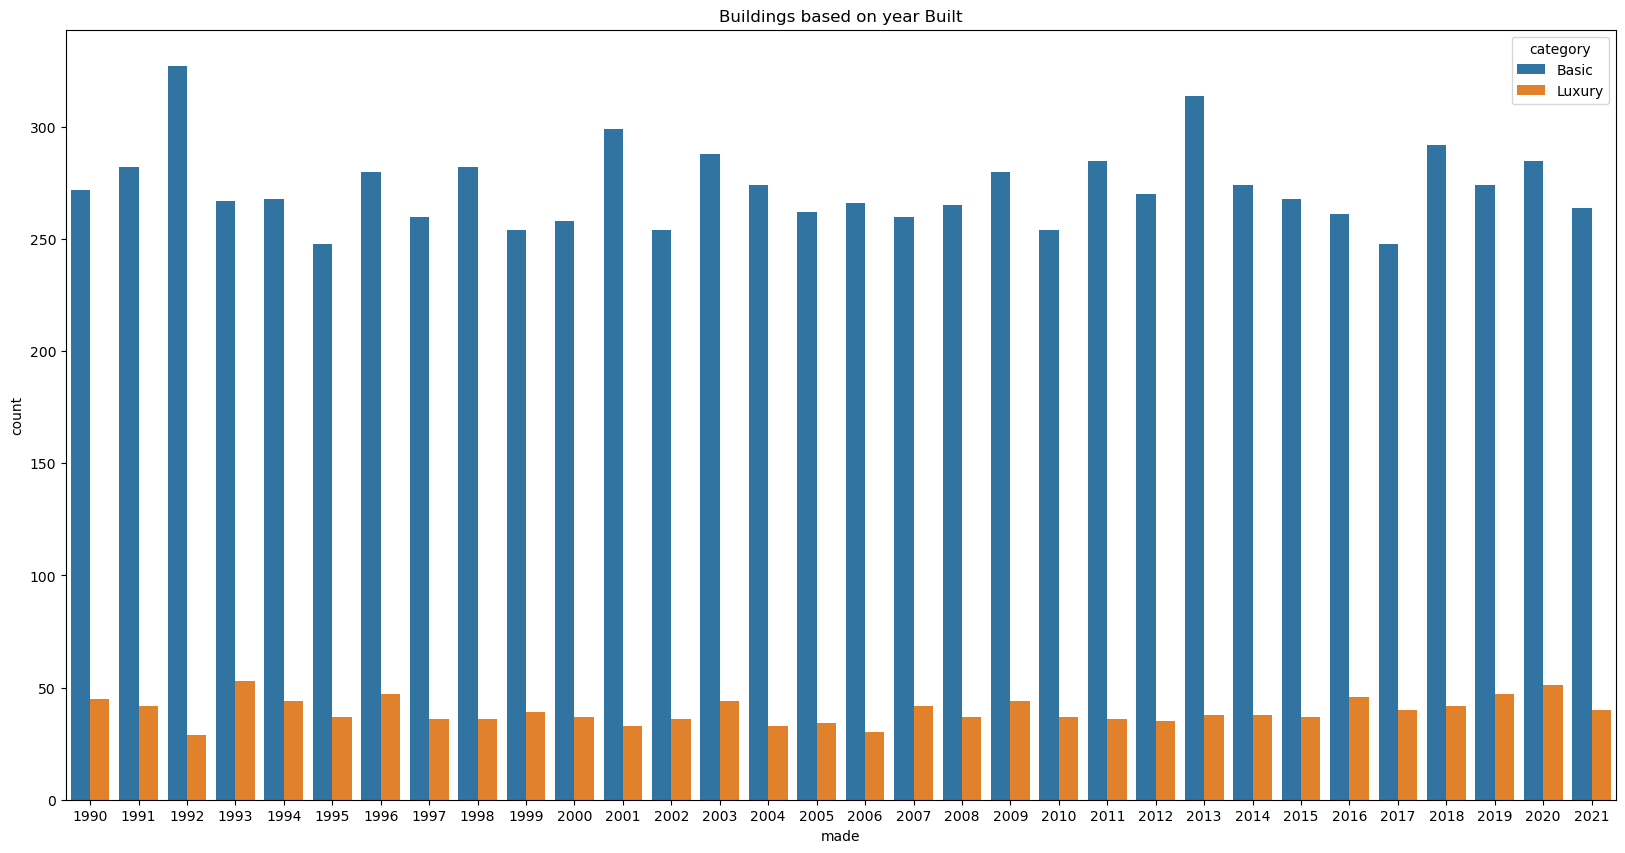

In [17]:
plt.figure(figsize = (20,10))
plt.title("Buildings based on year Built")
sns.countplot(hse, x="made", hue="category")

<Axes: title={'center': 'Buildings with Storm Protector'}, xlabel='hasStormProtector', ylabel='count'>

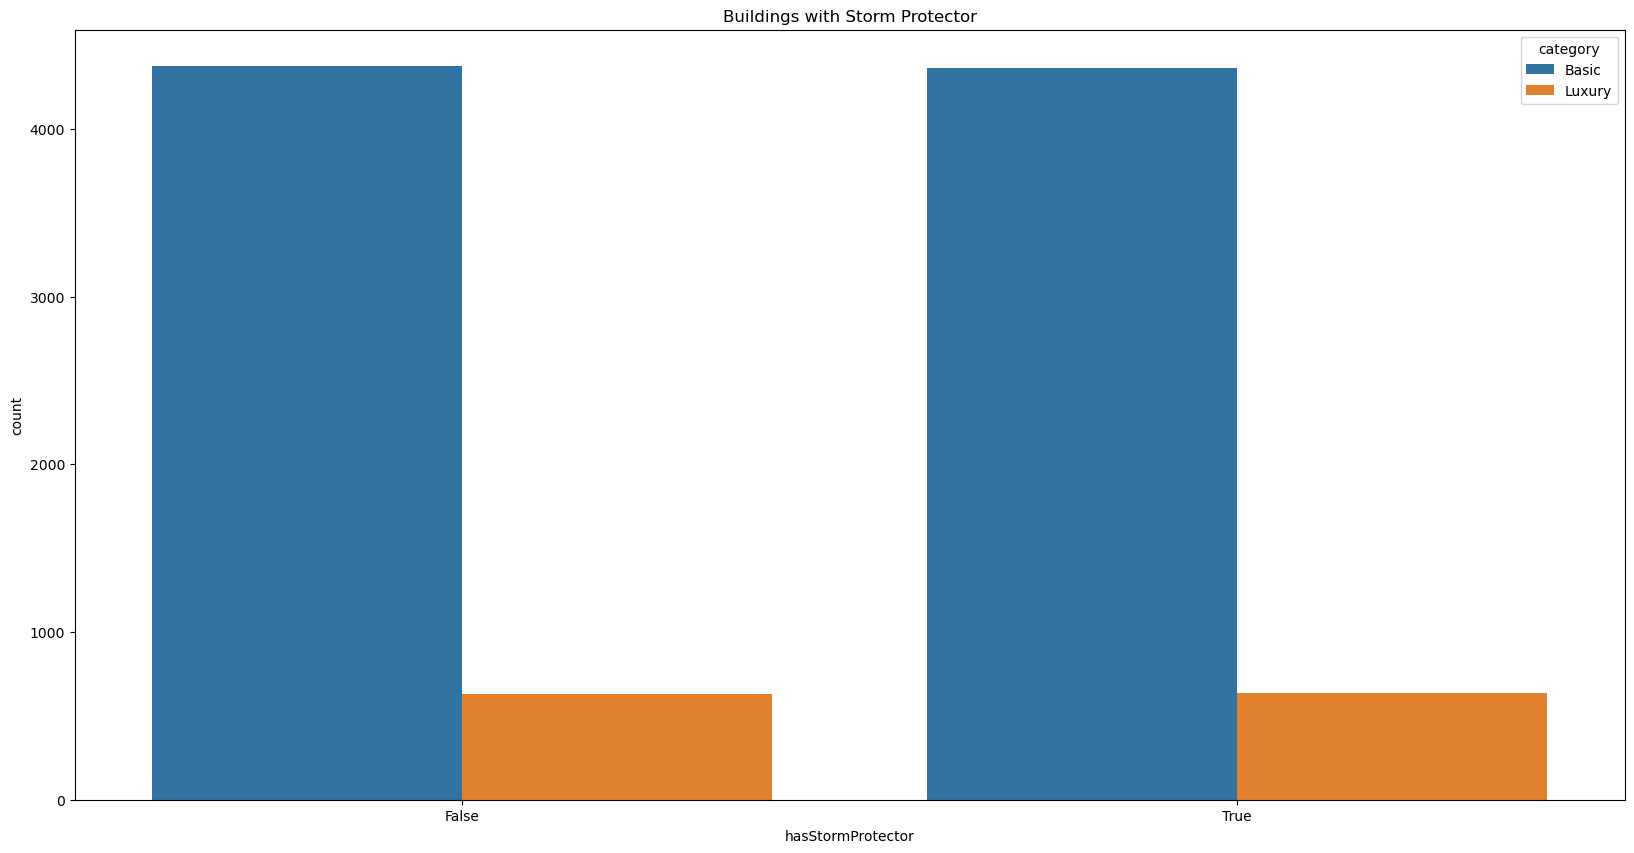

In [18]:
plt.figure(figsize = (20,10))
plt.title("Buildings with Storm Protector")
sns.countplot(hse, x="hasStormProtector", hue="category")  

<Axes: title={'center': 'Buildings with Previous owners'}, xlabel='numPrevOwners', ylabel='count'>

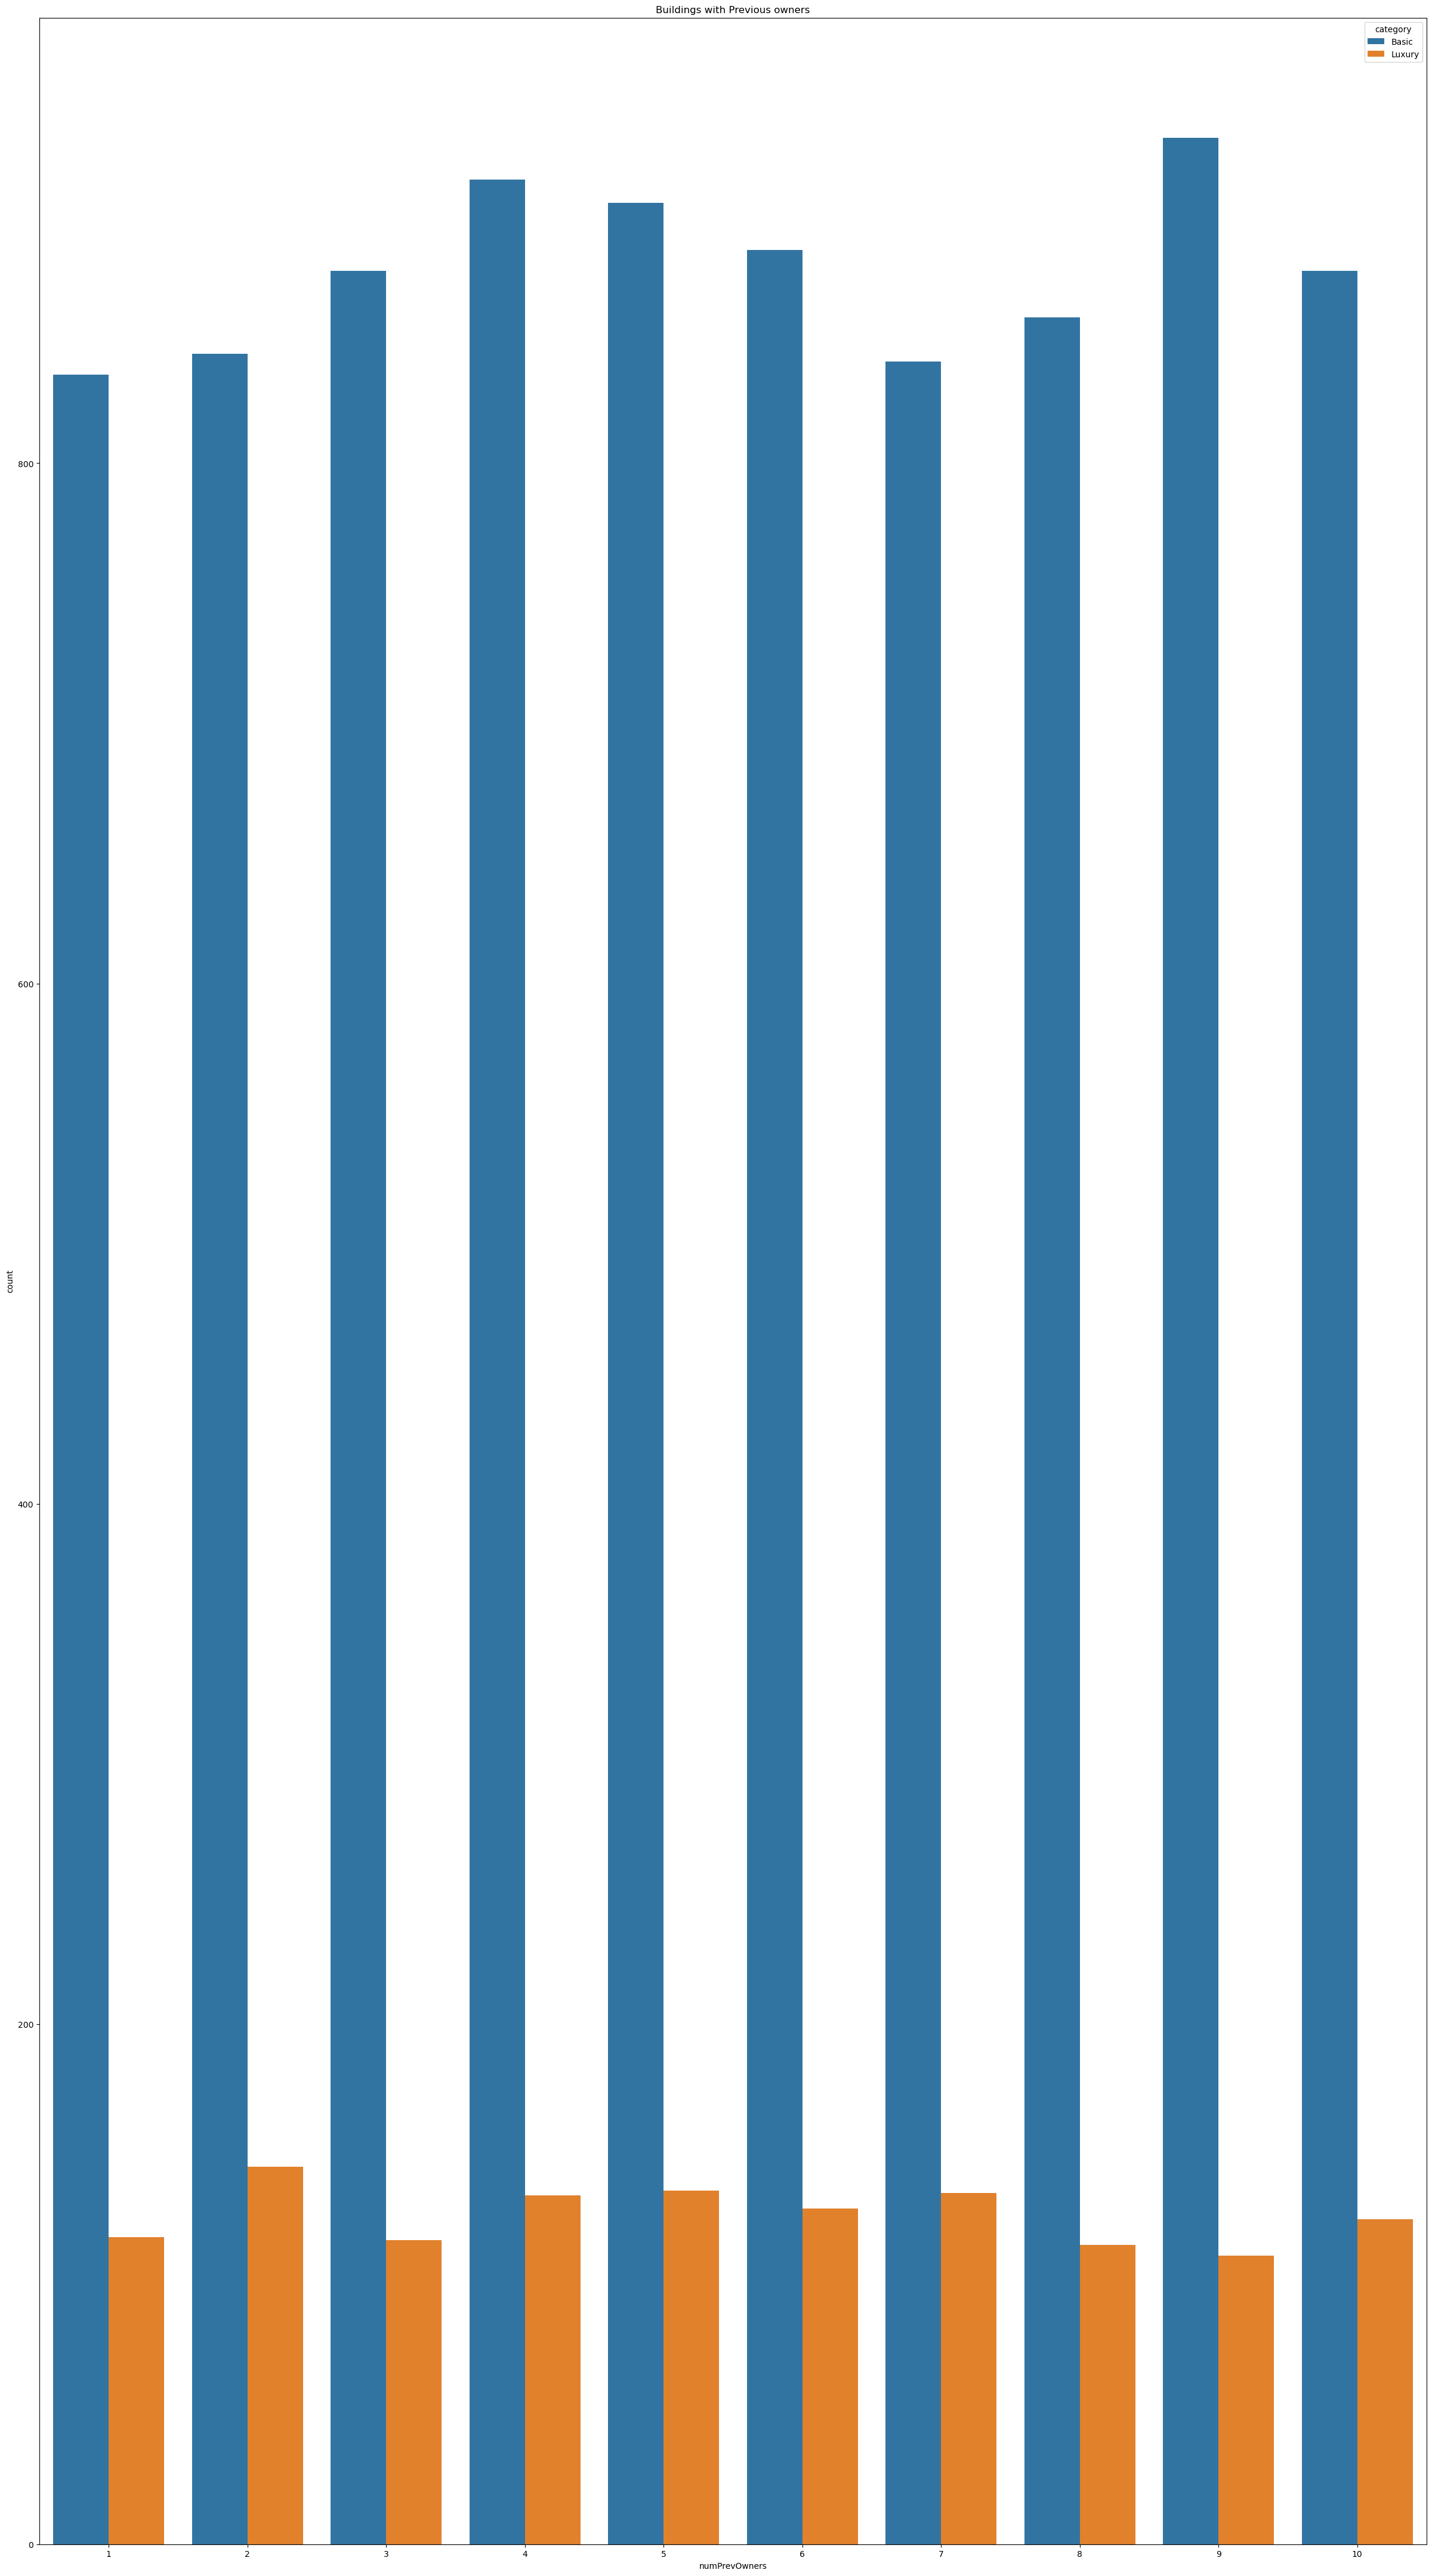

In [19]:
plt.figure(figsize = (30,55))
plt.title("Buildings with Previous owners")
sns.countplot(hse, x="numPrevOwners", hue="category")  

<Axes: title={'center': 'Buildings with Number of Rooms'}, xlabel='numberOfRooms', ylabel='count'>

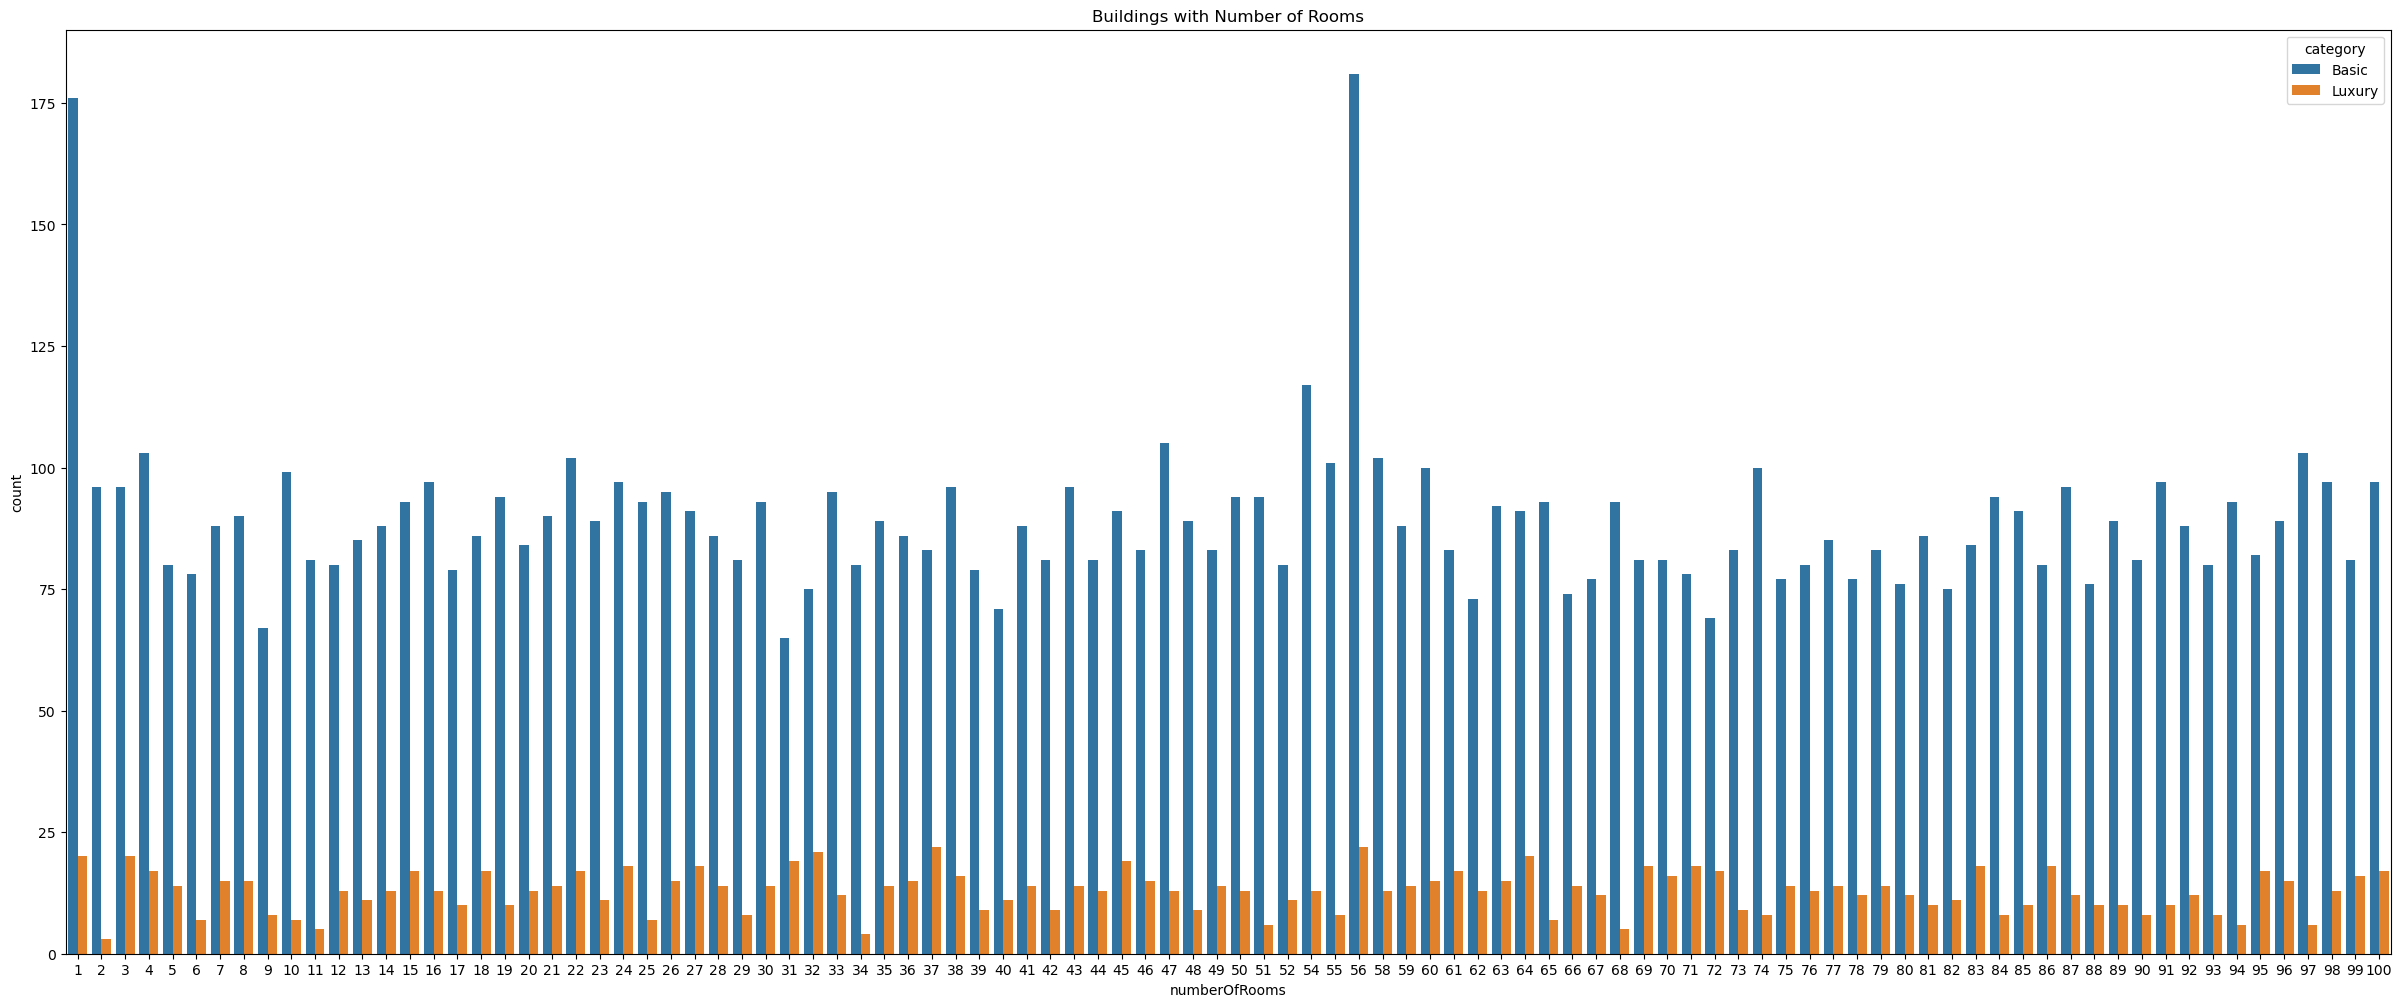

In [20]:
plt.figure(figsize = (30,12))
plt.title("Buildings with Number of Rooms")
sns.countplot(hse, x="numberOfRooms", hue="category")  

<Axes: title={'center': 'Buildings with Number of Floors'}, xlabel='floors', ylabel='count'>

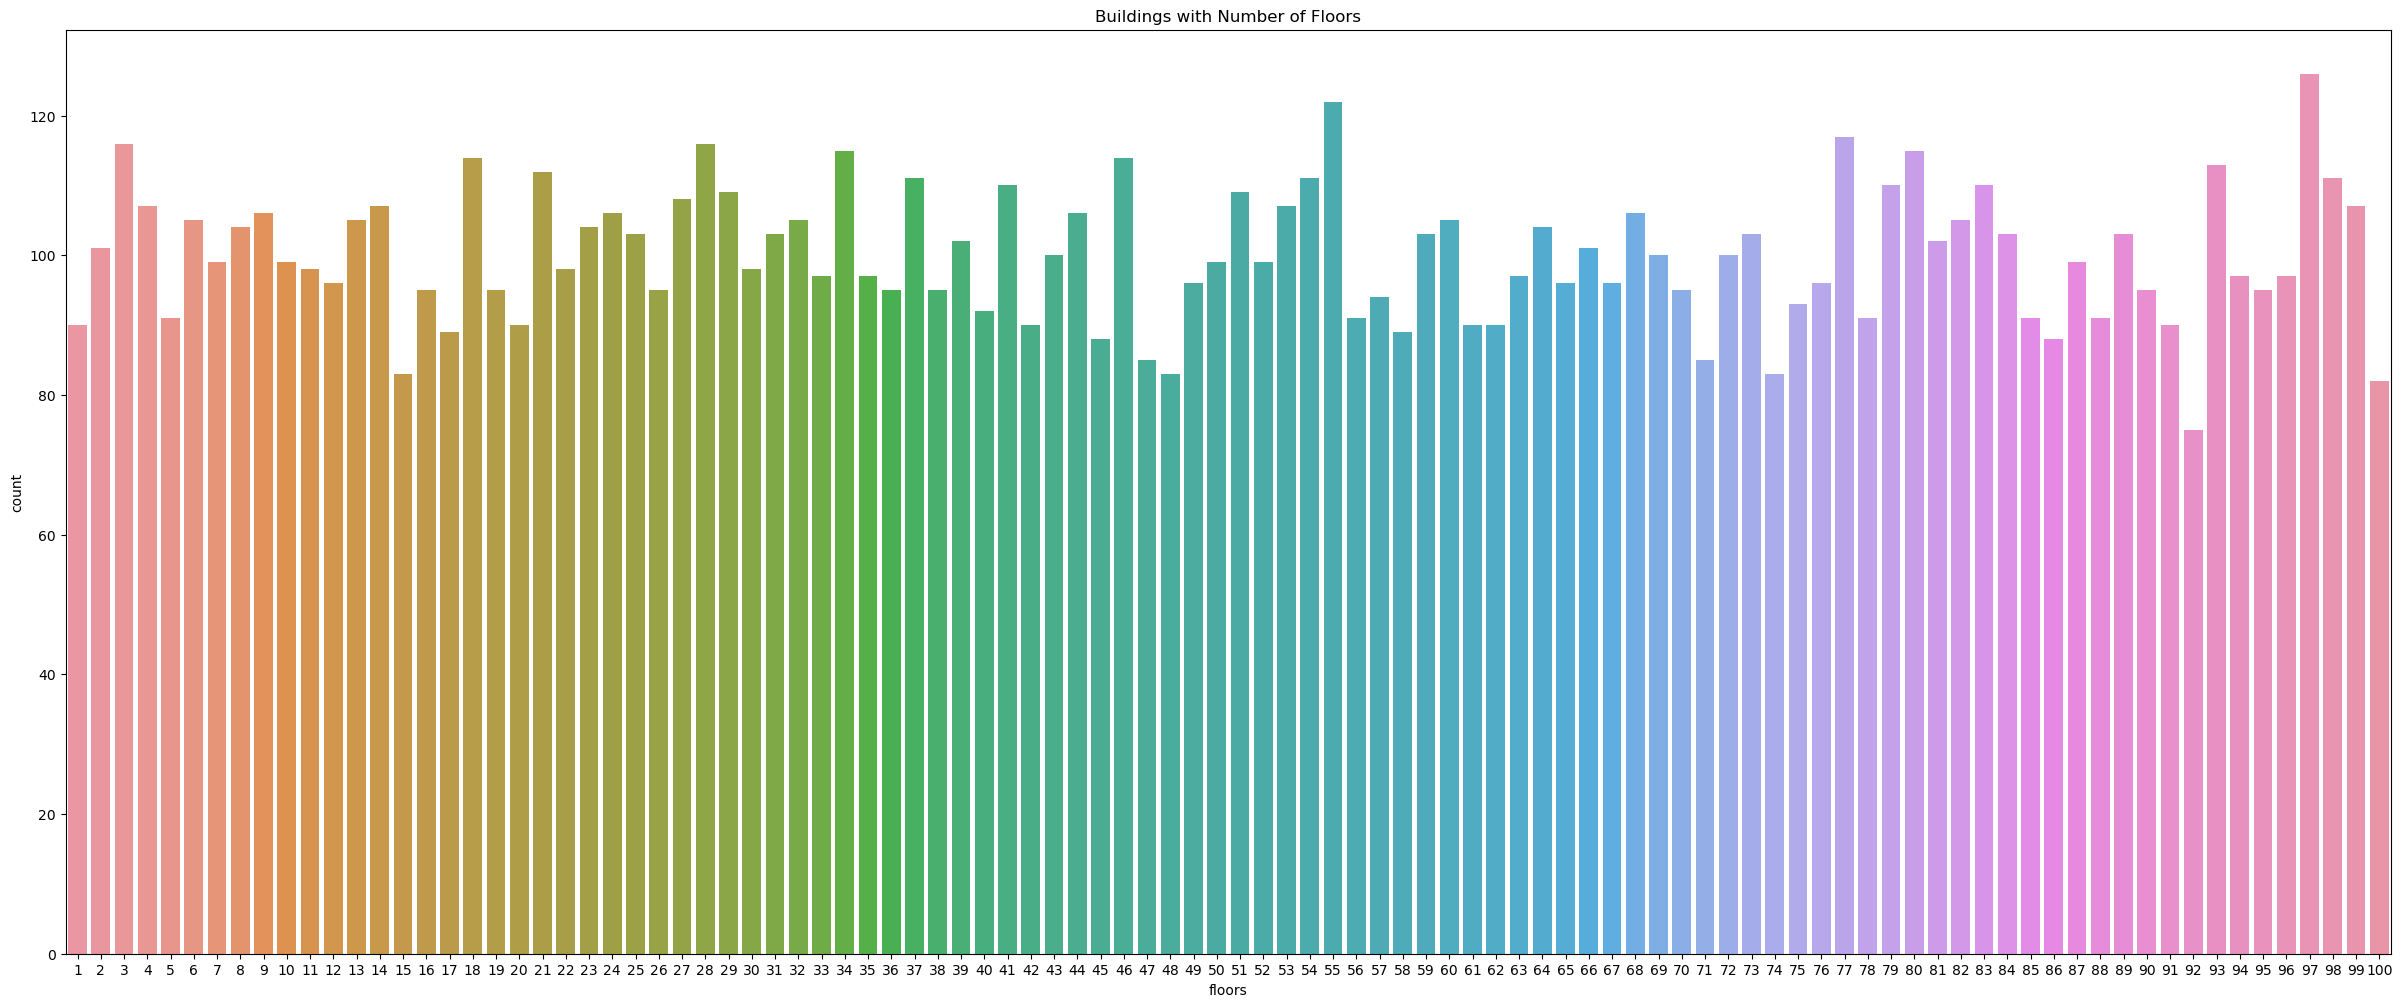

In [21]:
plt.figure(figsize = (30,12))
plt.title("Buildings with Number of Floors")
sns.countplot(hse, x="floors")  
             

<Axes: title={'center': 'Buildings with garage'}, xlabel='garage', ylabel='Count'>

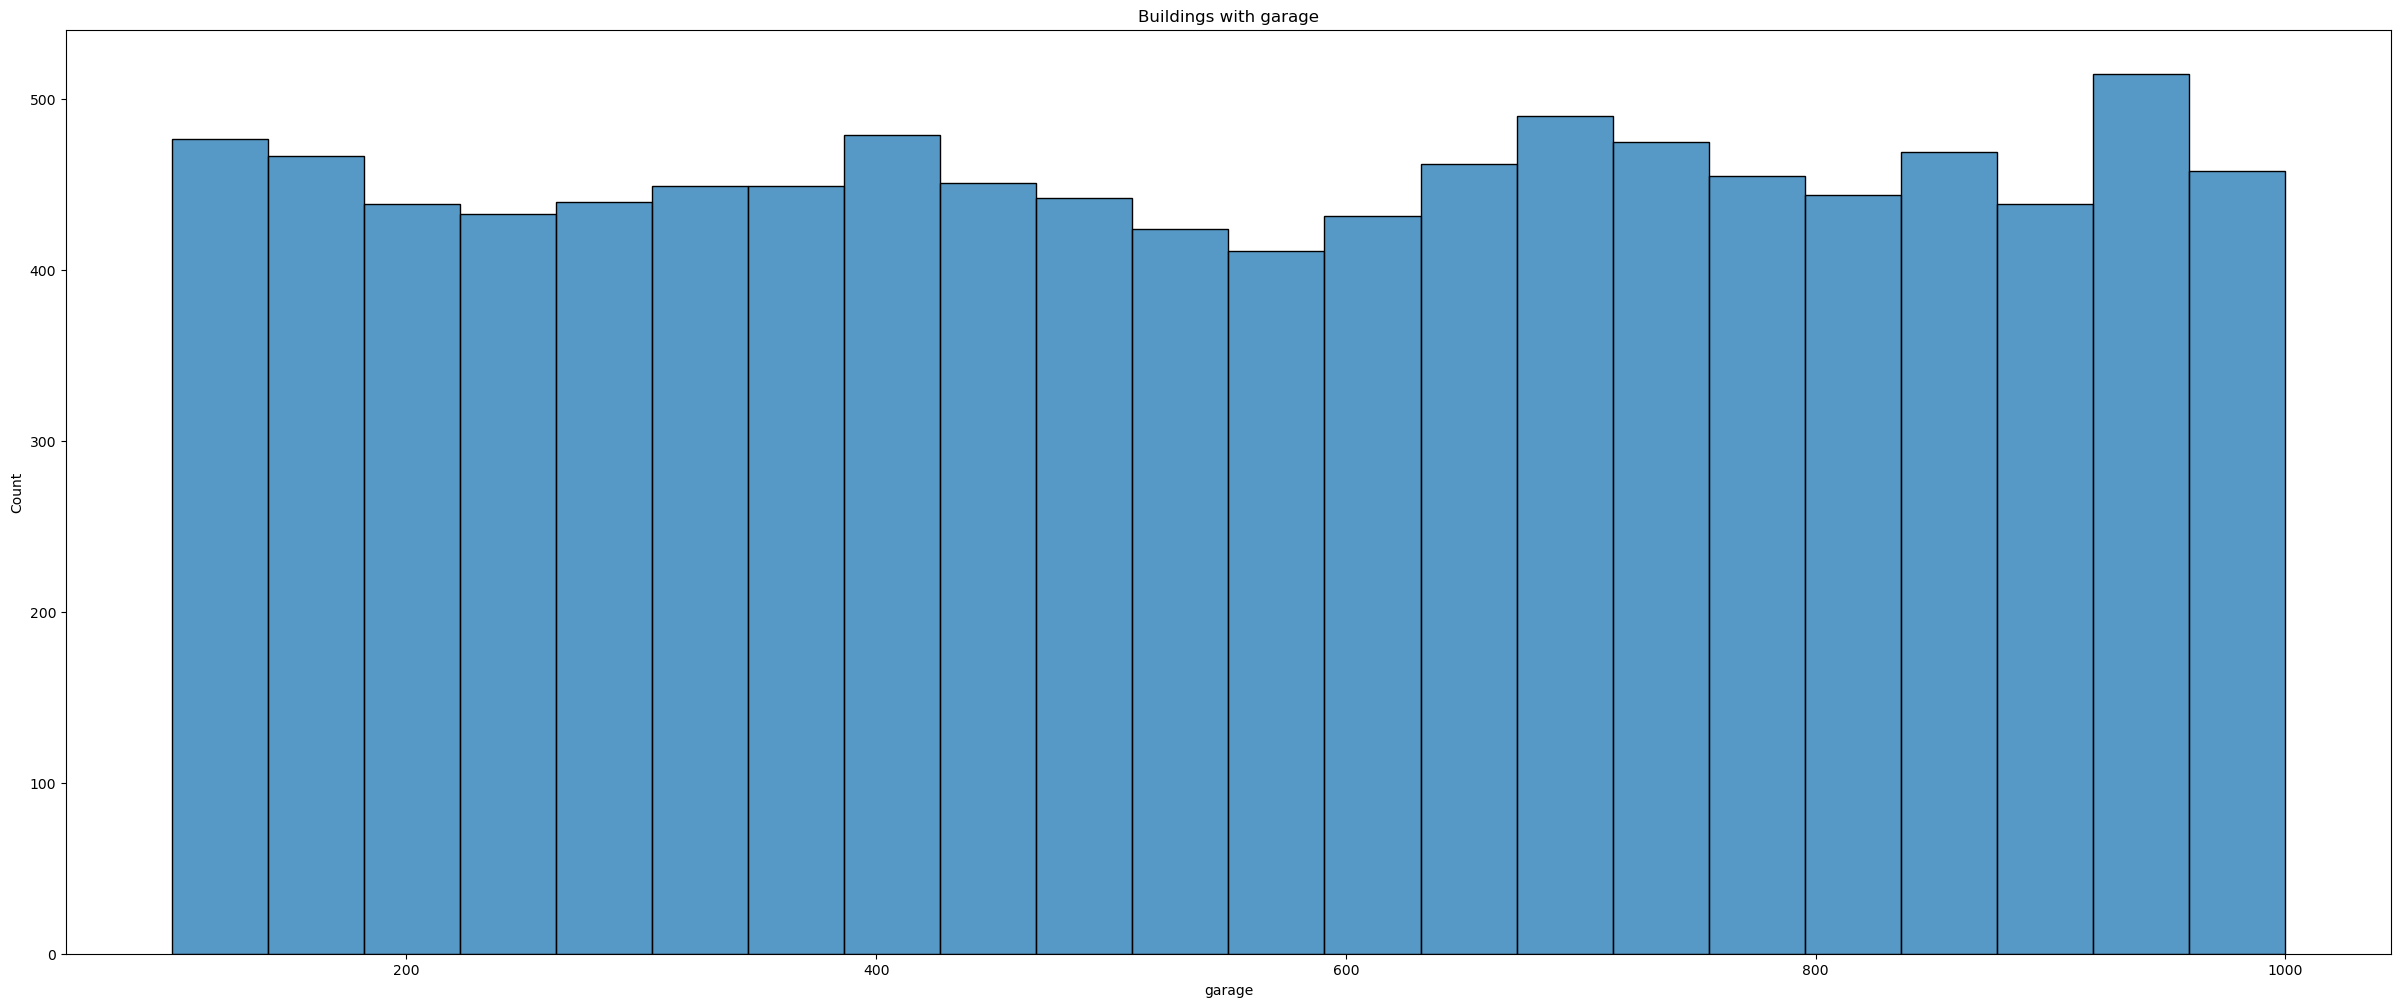

In [37]:
plt.figure(figsize = (30,12))
plt.title("Buildings with garage")
sns.histplot(hse, x="garage")  


In [22]:
#Encoding the unique values of my columns to 0,1,2
le=LabelEncoder()
hse["isNewBuilt"]=le.fit_transform(hse["isNewBuilt"])
hse["hasStormProtector"]=le.fit_transform(hse["hasStormProtector"])
hse["hasStorageRoom"]=le.fit_transform(hse["hasStorageRoom"])
hse["category"]=le.fit_transform(hse["category"])
hse["PoolAndYard"]=le.fit_transform(hse["PoolAndYard"])
hse.head(3)

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,0,75523,3,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,0,1
1,1,80771,39,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,1,0
2,2,55712,58,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,0,1


In [23]:
# The correlation matrix table
hse.corr()

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
Unnamed: 0,1.000000,-0.005911,-0.006441,0.001541,0.015182,-0.009318,-0.003971,0.007915,-0.016957,-0.007086,0.007543,0.010291,-0.000812,-0.012155,0.004915,-0.005913,-0.009246,-0.002464
squareMeters,-0.005911,1.000000,0.011675,0.001109,-0.001541,0.008758,0.016619,-0.007207,-0.010667,0.007480,-0.003960,-0.000588,-0.017246,-0.003486,-0.000623,0.999999,-0.011800,0.007928
numberOfRooms,-0.006441,0.011675,1.000000,0.023757,0.008357,0.011011,0.015962,0.005504,-0.002686,-0.003063,-0.017504,0.012910,0.023982,-0.009339,-0.016528,0.011695,-0.000002,-0.010954
floors,0.001541,0.001109,0.023757,1.000000,0.002207,-0.004921,0.002463,0.005022,0.002458,-0.008566,0.006228,-0.000270,0.011303,0.003616,-0.021155,0.001654,-0.003827,0.003954
cityCode,0.015182,-0.001541,0.008357,0.002207,1.000000,0.011334,-0.007549,0.009266,-0.000224,-0.004941,0.002652,-0.002019,-0.002208,0.002554,-0.003338,-0.001539,0.003950,-0.010180
cityPartRange,-0.009318,0.008758,0.011011,-0.004921,0.011334,1.000000,0.009238,0.007748,-0.001874,0.005224,0.004743,0.010696,-0.001648,-0.011338,-0.007153,0.008813,-0.003171,-0.015222
numPrevOwners,-0.003971,0.016619,0.015962,0.002463,-0.007549,0.009238,1.000000,0.006858,-0.017420,0.002522,-0.000862,0.000719,0.020268,0.031707,-0.006082,0.016619,-0.012843,0.004186
made,0.007915,-0.007207,0.005504,0.005022,0.009266,0.007748,0.006858,1.000000,-0.001678,-0.000645,-0.005506,0.013773,0.005687,-0.007868,-0.005431,-0.007210,0.005399,-0.002667
isNewBuilt,-0.016957,-0.010667,-0.002686,0.002458,-0.000224,-0.001874,-0.017420,-0.001678,1.000000,0.003200,-0.015986,0.020127,0.002749,0.007011,0.019895,-0.010643,0.381237,0.003552
hasStormProtector,-0.007086,0.007480,-0.003063,-0.008566,-0.004941,0.005224,0.002522,-0.000645,0.003200,1.000000,-0.005001,-0.003753,0.003758,0.001401,-0.006549,0.007496,0.002182,0.004267


<Axes: >

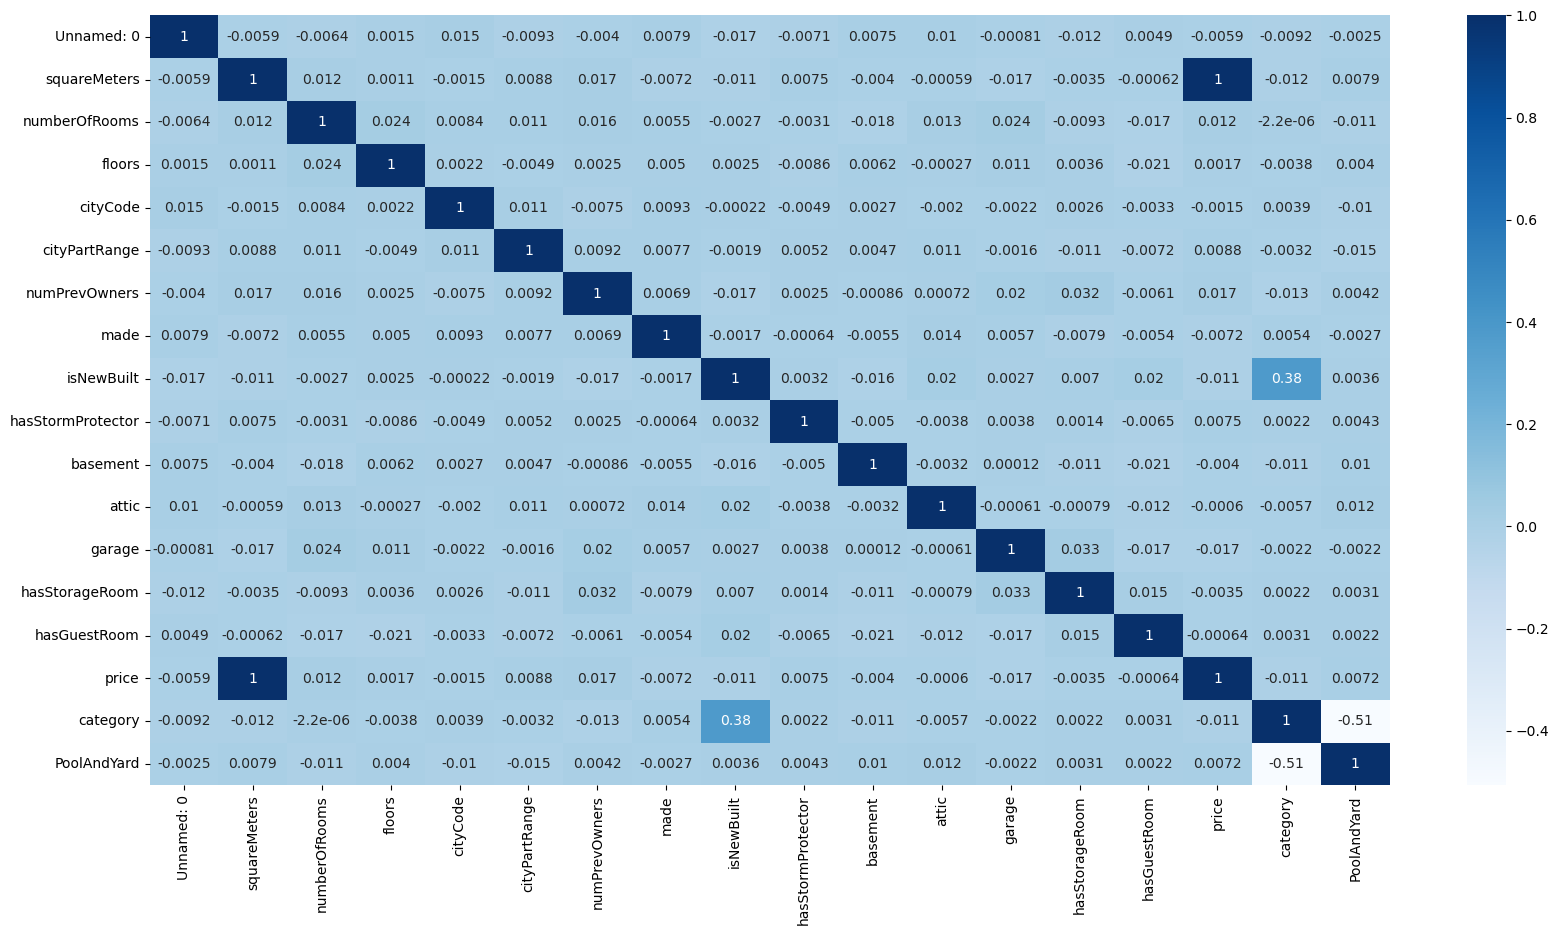

In [24]:
plt.figure(figsize = (20,10))
corr = hse.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

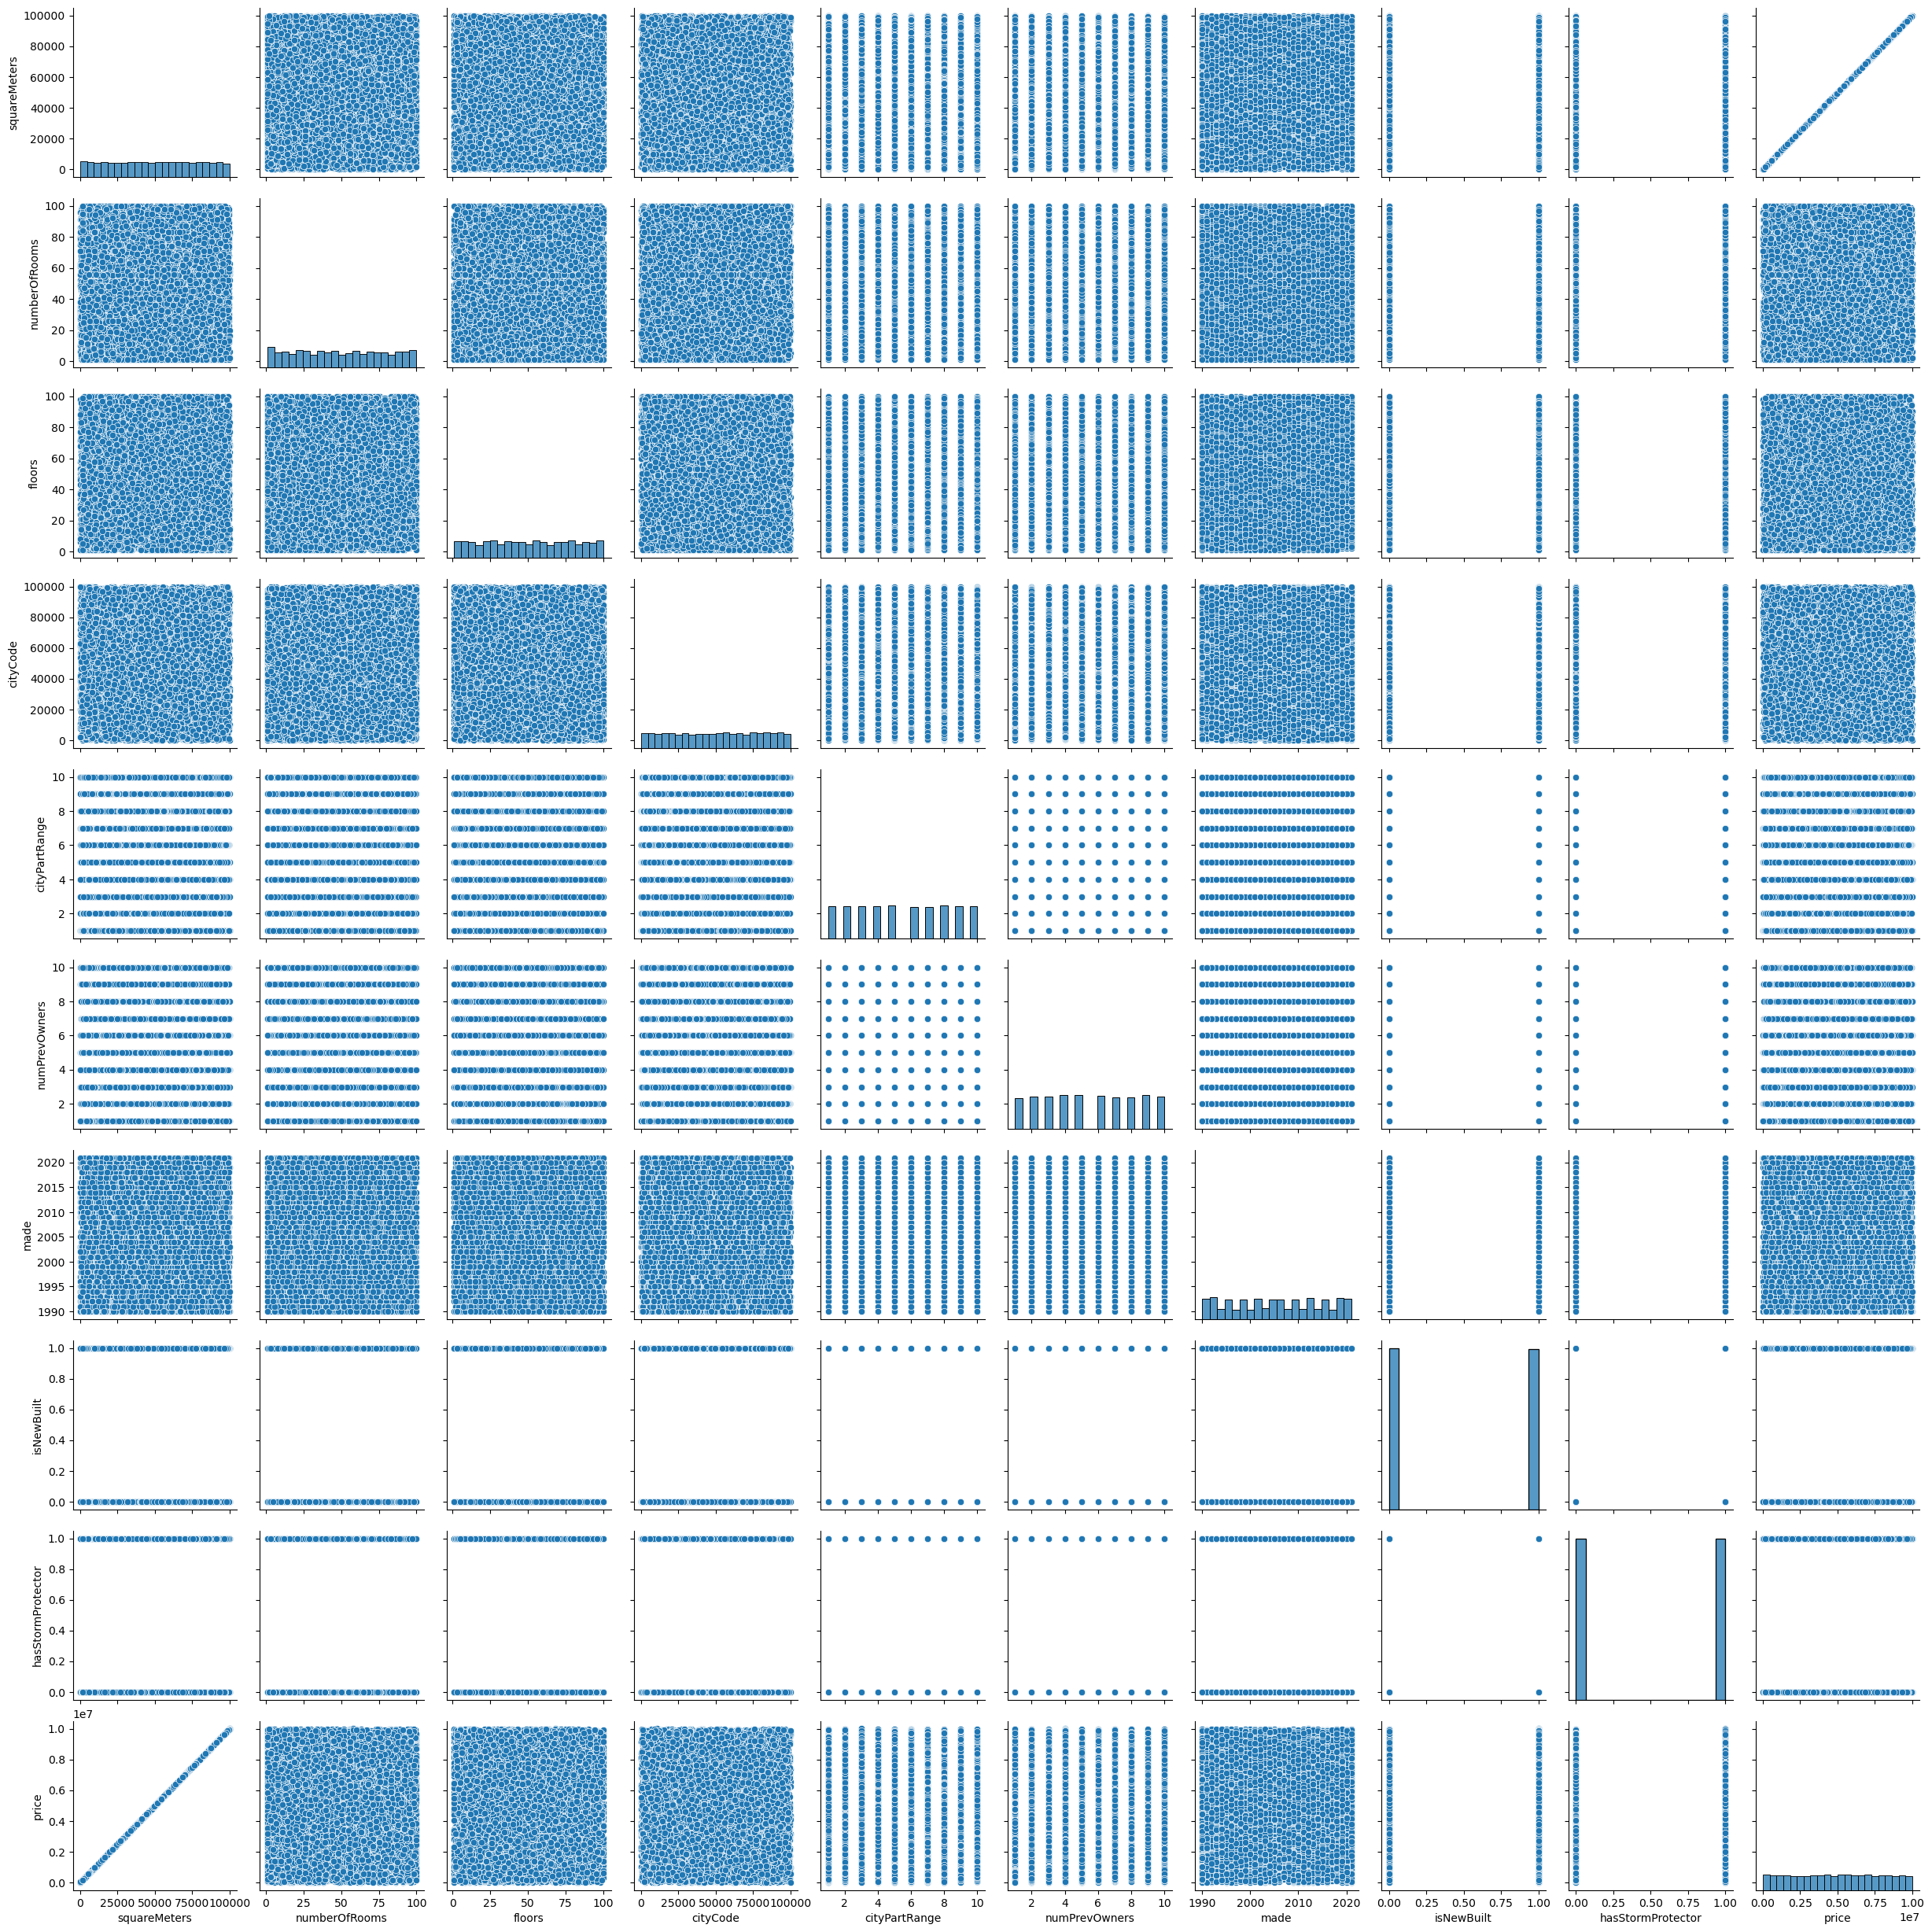

In [25]:
sns.pairplot(hse.iloc[:,[1,2,3,4,5,6,7,8,9,15]])

### K-means Clustering


In [31]:
from sklearn.preprocessing import StandardScaler
X = hse.iloc[:,[1,15]].values

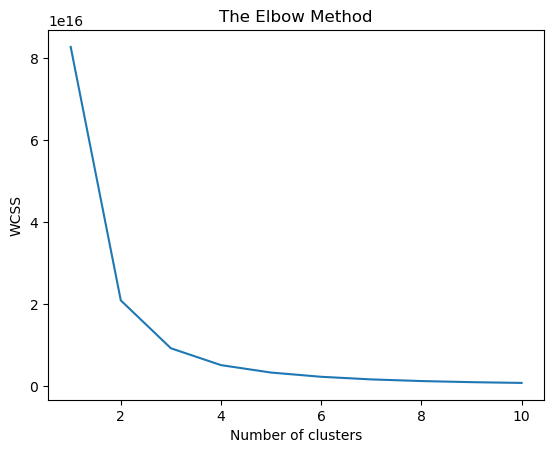

In [32]:
#using thr elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1 , 11):
    Kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
kmeans = KMeans(n_clusters = 4, init ='k-means++', random_state =42)
y_kmeans = kmeans.fit_predict(X)

In [34]:
print(X)

[[7.5523000e+04 7.5590815e+06]
 [8.0771000e+04 8.0859895e+06]
 [5.5712000e+04 5.5746421e+06]
 ...
 [8.3841000e+04 8.3900305e+06]
 [5.9036000e+04 5.9051070e+06]
 [1.4400000e+03 1.4670840e+05]]


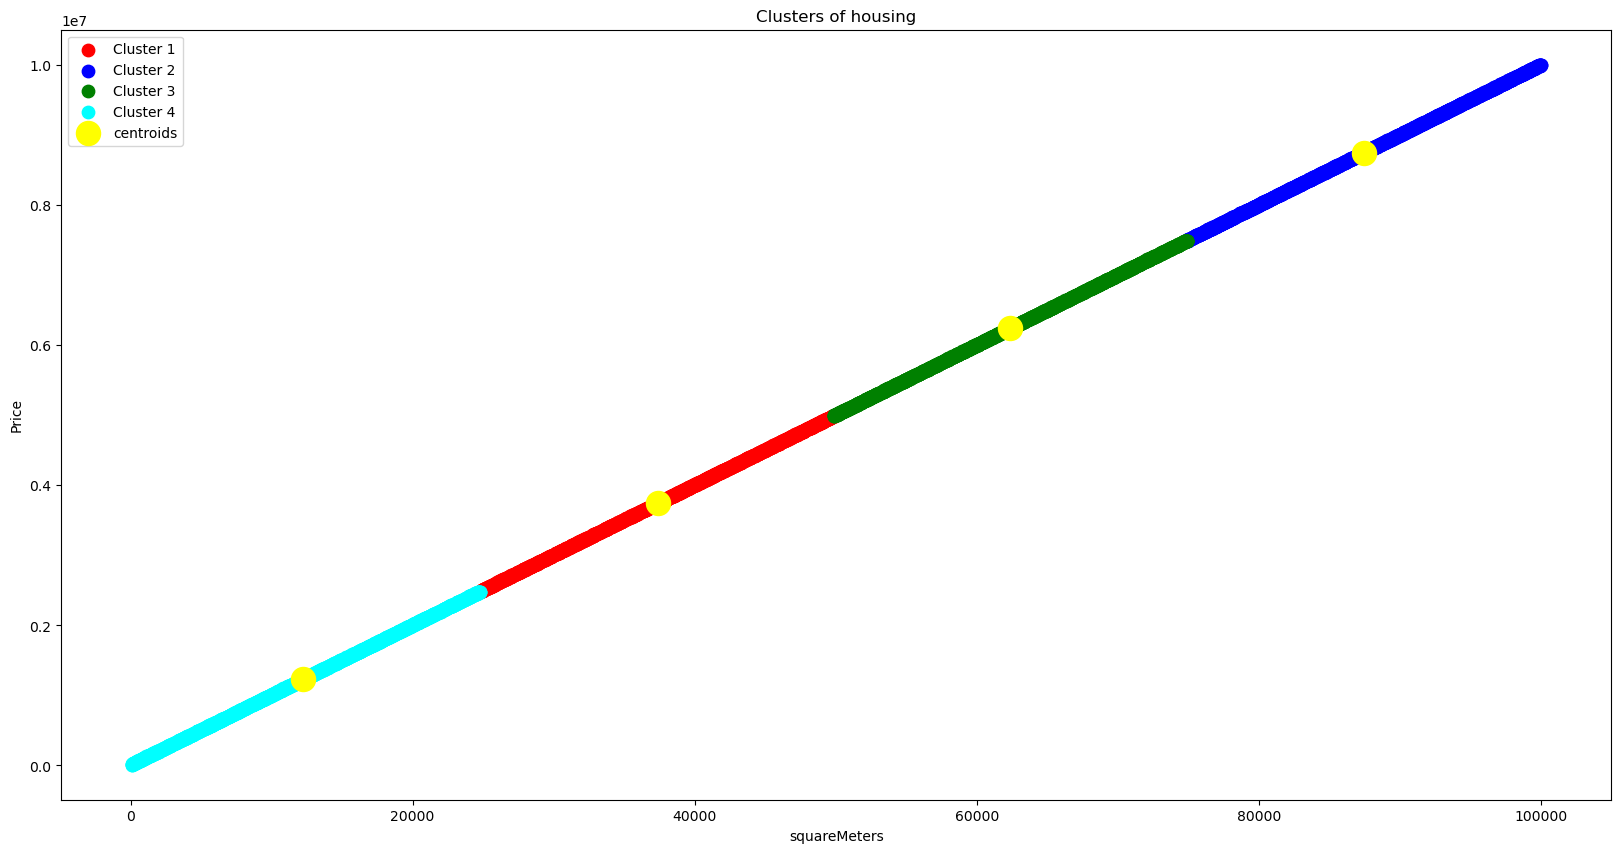

In [35]:
#visualising the clusters
plt.figure(figsize=(20,10))
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 80, c = 'red', label ='Cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 80, c = 'blue', label ='Cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 80, c = 'green', label ='Cluster 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 80, c = 'cyan', label ='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s = 300, c='yellow', label = 'centroids')
plt.title('Clusters of housing')
plt.xlabel('squareMeters')
plt.ylabel('Price')
plt.legend()
plt.show()